<a href="https://colab.research.google.com/github/yaolihua081/COVID-19-Project/blob/main/HW6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import altair as alt
import seaborn as sns
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import sys, platform, numpy as np, nltk, re, sklearn, pandas as pd, seaborn as sns, collections


from fbprophet import Prophet

import matplotlib.pyplot as plt

import matplotlib.style as style
style.use('fivethirtyeight')

In [2]:
ls

sample_data/


In [4]:
from google.colab import files
files.upload()

Saving United_States_COVIDOct30.csv to United_States_COVIDOct30.csv


{'United_States_COVIDOct30.csv': b'submission_date,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,created_at,consent_cases,consent_deaths\n01/22/2020,CO,0,,,0,,0,,,0,,03/26/2020 04:22:39 PM,Agree,Agree\n01/23/2020,CO,0,,,0,,0,,,0,,03/26/2020 04:22:39 PM,Agree,Agree\n01/24/2020,CO,0,,,0,,0,,,0,,03/26/2020 04:22:39 PM,Agree,Agree\n01/25/2020,CO,0,,,0,,0,,,0,,03/26/2020 04:22:39 PM,Agree,Agree\n01/26/2020,CO,0,,,0,,0,,,0,,03/26/2020 04:22:39 PM,Agree,Agree\n01/27/2020,CO,0,,,0,,0,,,0,,03/26/2020 04:22:39 PM,Agree,Agree\n01/28/2020,CO,0,,,0,,0,,,0,,03/26/2020 04:22:39 PM,Agree,Agree\n01/29/2020,CO,0,,,0,,0,,,0,,03/26/2020 04:22:39 PM,Agree,Agree\n01/30/2020,CO,0,,,0,,0,,,0,,03/26/2020 04:22:39 PM,Agree,Agree\n01/31/2020,CO,0,,,0,,0,,,0,,03/26/2020 04:22:39 PM,Agree,Agree\n02/01/2020,CO,0,,,0,,0,,,0,,03/26/2020 04:22:39 PM,Agree,Agree\n02/02/2020,CO,0,,,0,,0,,,0,,03/26/2020 04:22:39 PM,Agree,Agree\n02/03/2020,CO,0,,,0,,0,,,0,,03

In [5]:
United_States_Covid=pd.read_csv('United_States_COVIDOct30.csv')

United_States_Covid.dropna()
United_States_Covid.head()

,submission_date,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,created_at,consent_cases,consent_deaths
85,04/16/2020,CO,8582,7941.0,641.0,302,641.0,373,363.0,10.0,16,10.0,04/16/2020 04:22:39 PM,Agree,Agree
88,04/19/2020,CO,9634,8915.0,719.0,201,719.0,421,408.0,13.0,10,13.0,04/19/2020 04:22:39 PM,Agree,Agree
89,04/20/2020,CO,10019,9260.0,759.0,385,40.0,448,435.0,13.0,27,0.0,04/20/2020 04:22:39 PM,Agree,Agree
90,04/21/2020,CO,10368,9536.0,832.0,349,73.0,485,471.0,14.0,37,1.0,04/21/2020 04:22:39 PM,Agree,Agree
91,04/22/2020,CO,10825,9878.0,947.0,457,115.0,507,491.0,16.0,22,2.0,04/22/2020 04:22:39 PM,Agree,Agree
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16633,10/25/2020,FSM,0,0.0,0.0,0,0.0,0,0.0,0.0,0,0.0,10/26/2020 01:41:41 PM,Agree,Agree
16634,10/26/2020,FSM,0,0.0,0.0,0,0.0,0,0.0,0.0,0,0.0,10/27/2020 01:47:53 PM,Agree,Agree
16635,10/27/2020,FSM,0,0.0,0.0,0,0.0,0,0.0,0.0,0,0.0,10/28/2020 01:52:28 PM,Agree,Agree
16636,10/28/2020,FSM,0,0.0,0.0,0,0.0,0,0.0,0.0,0,0.0,10/29/2020 02:11:33 PM,Agree,Agree


,submission_date,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,created_at,consent_cases,consent_deaths
0,01/22/2020,CO,0,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,03/26/2020 04:22:39 PM,Agree,Agree
1,01/23/2020,CO,0,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,03/26/2020 04:22:39 PM,Agree,Agree
2,01/24/2020,CO,0,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,03/26/2020 04:22:39 PM,Agree,Agree
3,01/25/2020,CO,0,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,03/26/2020 04:22:39 PM,Agree,Agree
4,01/26/2020,CO,0,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,03/26/2020 04:22:39 PM,Agree,Agree


In [6]:
United_States_Covid['month']=pd.DatetimeIndex(United_States_Covid['submission_date']).month

all_dates=United_States_Covid['submission_date'].unique()
#all_dates
United_States_Covid_modify=pd.concat([pd.DataFrame(United_States_Covid.groupby('submission_date')['new_death'].sum().values),
                                         pd.DataFrame(United_States_Covid.groupby('submission_date')['new_case'].sum().values)],axis=1)
United_States_Covid_modify.columns=['all_state_death','all_state_case']
United_States_Covid_modify['submission_date']=all_dates

United_States_Covid_modify

,all_state_death,all_state_case,submission_date
0,0,1,01/22/2020
1,0,0,01/23/2020
2,0,1,01/24/2020
3,0,0,01/25/2020
4,0,3,01/26/2020
...,...,...,...
277,380,63195,10/25/2020
278,483,63589,10/26/2020
279,901,72183,10/27/2020
280,1060,81599,10/28/2020


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


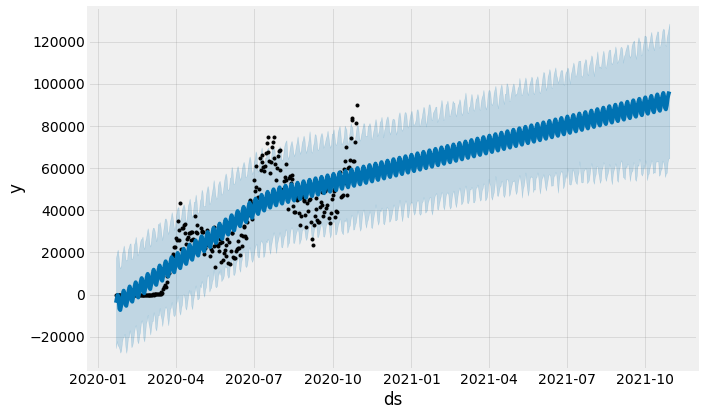

Text(0.5, 1.0, 'COVID-19 Cases Prediction')

Text(0.5, 25.200000000000003, 'date')

Text(25.200000000000003, 0.5, 'COVID-19 Cases')

Text(0, 0.5, 'COVID-19 Cases')

Text(0.5, 0, 'date')

Text(0.5, 1.0, 'Prediction of COVID-19 Cases')

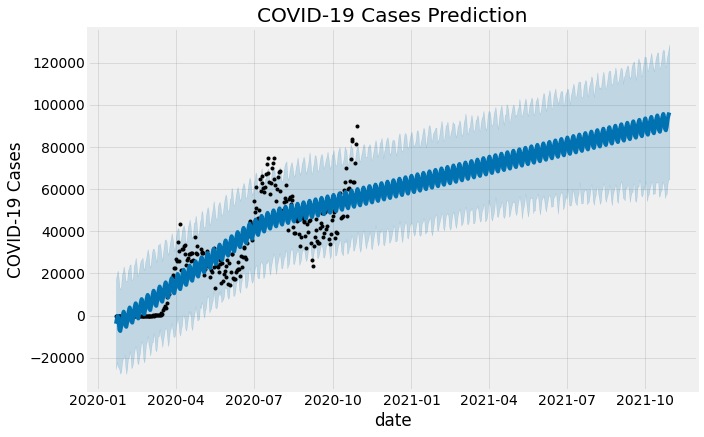

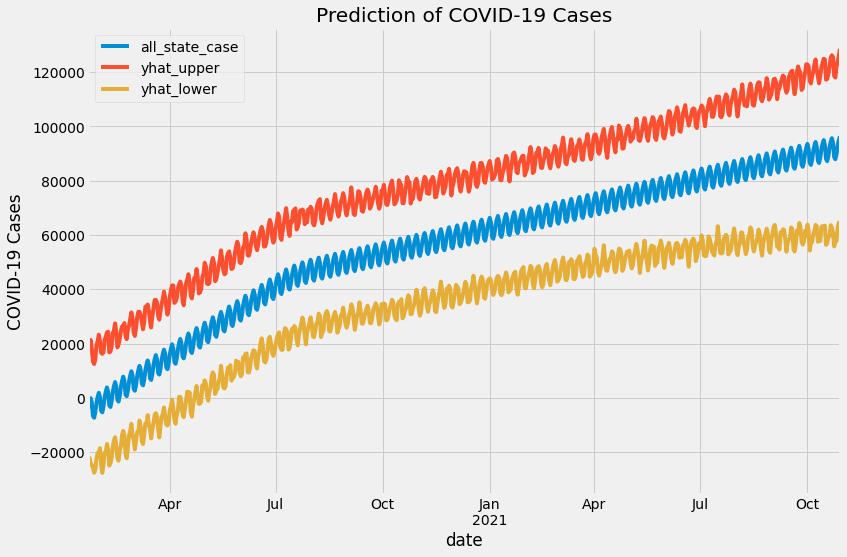

In [12]:

United_States_Covid_modify_temp=United_States_Covid_modify


United_States_Covid_modify_temp.rename(columns={"submission_date": "ds", "all_state_case": 'y'}, inplace=True)
my_model = Prophet(interval_width=.95)
my_model.fit(United_States_Covid_modify_temp)
future_dates=my_model.make_future_dataframe(periods=365, freq='D', include_history=True)
forecast = my_model.predict(future_dates)
my_model.plot(forecast)
plt.title('COVID-19 Cases Prediction')
plt.xlabel('date')
plt.ylabel('COVID-19 Cases')
  #forecast.head()
forecast.rename(columns={"ds": "submission_date", "yhat": 'all_state_case'}, inplace=True)

forecast_modify_case=forecast[['submission_date','all_state_case','yhat_upper','yhat_lower']]
plt.style.use('fivethirtyeight')
ax = forecast_modify_case.set_index('submission_date').plot(figsize=(12, 8))
ax.set_ylabel('COVID-19 Cases')
ax.set_xlabel('date')
ax.set_title('Prediction of COVID-19 Cases')
plt.show()


,all_state_death,all_state_case,submission_date
0,0,1,01/22/2020
1,0,0,01/23/2020
2,0,1,01/24/2020
3,0,0,01/25/2020
4,0,3,01/26/2020
...,...,...,...
277,380,63195,10/25/2020
278,483,63589,10/26/2020
279,901,72183,10/27/2020
280,1060,81599,10/28/2020


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Text(0, 0.5, 'COVID-19 Deaths')

Text(0.5, 0, 'date')

Text(0.5, 1.0, 'Prediction of COVID-19 Deaths')

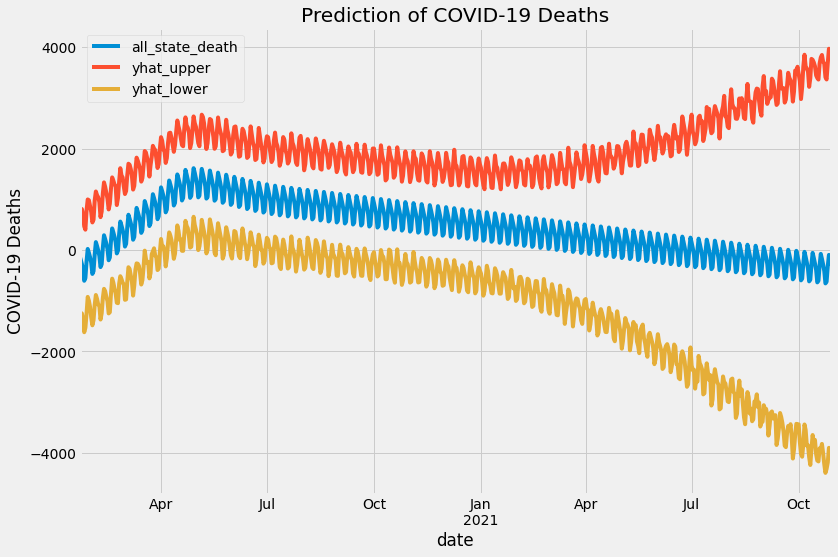

In [159]:
#all_dates
United_States_Covid_modify=pd.concat([pd.DataFrame(United_States_Covid.groupby('submission_date')['new_death'].sum().values),
                                         pd.DataFrame(United_States_Covid.groupby('submission_date')['new_case'].sum().values)],axis=1)
United_States_Covid_modify.columns=['all_state_death','all_state_case']
United_States_Covid_modify['submission_date']=all_dates

United_States_Covid_modify
United_States_Covid_modify_temp=United_States_Covid_modify


United_States_Covid_modify_temp.rename(columns={"submission_date": "ds", "all_state_death": 'y'}, inplace=True)
my_model = Prophet(interval_width=.95)
my_model.fit(United_States_Covid_modify_temp)
future_dates=my_model.make_future_dataframe(periods=365, freq='D', include_history=True)
forecast = my_model.predict(future_dates)
  #forecast.head()
forecast.rename(columns={"ds": "submission_date", "yhat": 'all_state_death'}, inplace=True)

forecast_modify_death=forecast[['submission_date','all_state_death','yhat_upper','yhat_lower']]
plt.style.use('fivethirtyeight')
ax = forecast_modify_death.set_index('submission_date').plot(figsize=(12, 8))
ax.set_ylabel('COVID-19 Deaths')
ax.set_xlabel('date')
ax.set_title('Prediction of COVID-19 Deaths')
plt.show()

In [160]:
forecast_modify_death
forecast_modify_case
forecast_all=pd.concat([forecast_modify_case,forecast_modify_death['all_state_death']],axis=1)
#forecast_all=pd.merge(forecast_modify_case,forecast_modify_death['all_state_death'])
forecast_all

my_model.plot(forecast_all)

,submission_date,all_state_death,yhat_upper,yhat_lower
0,2020-01-22,-113.955021,891.765874,-1185.172632
1,2020-01-23,-190.345582,752.953464,-1254.904907
2,2020-01-24,-277.563996,807.003270,-1251.662034
3,2020-01-25,-385.215647,681.007525,-1379.411794
4,2020-01-26,-607.056813,465.729570,-1620.693620
...,...,...,...,...
642,2021-10-25,-625.381901,3362.025599,-4314.442939
643,2021-10-26,-320.202977,3682.545656,-4190.425437
644,2021-10-27,-96.938787,3967.532080,-3900.233427
645,2021-10-28,-195.453879,3860.477442,-4081.409548


,submission_date,all_state_case,yhat_upper,yhat_lower
0,2020-01-22,-3849.016661,16649.693403,-24202.326869
1,2020-01-23,-1695.145310,18892.879587,-21519.505946
2,2020-01-24,-111.822386,20326.487799,-22071.343462
3,2020-01-25,-1682.912323,19421.369658,-24296.294730
4,2020-01-26,-6693.421407,14390.157003,-25420.358272
...,...,...,...,...
642,2021-10-25,87904.680589,120378.393742,53575.448673
643,2021-10-26,89753.717560,124013.141660,57381.668648
644,2021-10-27,92966.922689,126916.786835,62100.791682
645,2021-10-28,94936.635737,130222.821218,63474.158776


,submission_date,all_state_case,yhat_upper,yhat_lower,all_state_death
0,2020-01-22,-3849.016661,16649.693403,-24202.326869,-113.955021
1,2020-01-23,-1695.145310,18892.879587,-21519.505946,-190.345582
2,2020-01-24,-111.822386,20326.487799,-22071.343462,-277.563996
3,2020-01-25,-1682.912323,19421.369658,-24296.294730,-385.215647
4,2020-01-26,-6693.421407,14390.157003,-25420.358272,-607.056813
...,...,...,...,...,...
642,2021-10-25,87904.680589,120378.393742,53575.448673,-625.381901
643,2021-10-26,89753.717560,124013.141660,57381.668648,-320.202977
644,2021-10-27,92966.922689,126916.786835,62100.791682,-96.938787
645,2021-10-28,94936.635737,130222.821218,63474.158776,-195.453879


Text(0.5, 1.0, 'Prediction of COVID-19 for USA for the Next 365 Days')

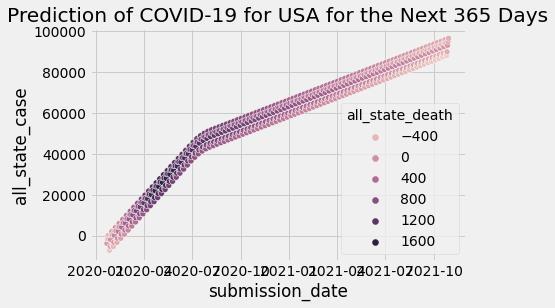

In [161]:
figsize=(15,15)
sns.scatterplot(x='submission_date', y='all_state_case', hue='all_state_death', data=forecast_all)
#sns.scatterplot(x='Date', y='High', hue='Volume', data=AABA_data)
plt.title('Prediction of COVID-19 for USA for the Next 365 Days')
plt.show()